# Regresión Logística

El laboratorio consiste en elaborar un modelo de predicción para la variable _target_ del conjunto de datos _heart_.

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [21]:
# Obteniendo el dataset
heart_df = pd.read_csv('heart.csv', sep=',', error_bad_lines=False)
# Impresión de los primeros datos
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Escalando los datos para darles forma uniforme
Se procederá a escalar los datos. Para ello utilizaré la librería de _sklearn_. 

In [22]:
# Importando la librería para estandarizar.
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Haciendo una lista de las columnas a escalar
columnas_escalables = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'thal', 'ca', 'restecg']

In [24]:
scaler = MinMaxScaler() # Creando una instancia del objeto
scaler.fit(heart_df[columnas_escalables]) # Se ajusta
heart_df[columnas_escalables] = scaler.transform(heart_df[columnas_escalables]) # Se transforman los datos

In [25]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,1.000000,0.481132,0.244292,1,0.0,0.603053,0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1,0.666667,0.339623,0.283105,0,0.5,0.885496,0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0,0.333333,0.339623,0.178082,0,0.0,0.770992,0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1,0.333333,0.245283,0.251142,0,0.5,0.816794,0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0,0.000000,0.245283,0.520548,0,0.5,0.702290,1,0.096774,1.0,0.0,0.666667,1


In [26]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlación entre datos
Procederé a describir de manera gráfica la relación que hay entre los datos, con énfasis en el atributo _target_.

**Correlación**

La correlación es un fenómeno matemático que indica el nivel de dependencia lineal que existe entre dos variables. Gracias a una gráfica de calor puede visualizarse de manera más amigable a la vista esta relación numérica entre dos atributos.

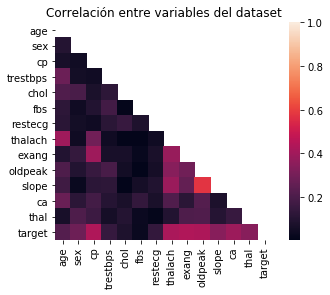

In [27]:
# Calculando la correlación entre variables (0 - 1)
corr = heart_df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # La máscara ayudará a que se vea en forma de escalón
# Heatmap
sns.heatmap(corr, mask=mask, square=True).set_title("Correlación entre variables del dataset");

Las columnas que aparentan más relación son 

columnas_correlacionadas = ['cp', 'thalach', 'exang', 'oldpeak', 'ca']

In [29]:
columnas_correlacionadas = ['cp', 'thalach', 'exang', 'oldpeak', 'ca']

c:\users\juandi~1\desktop\ufm\mlm\ene14\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
c:\users\juandi~1\desktop\ufm\mlm\ene14\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
c:\users\juandi~1\desktop\ufm\mlm\ene14\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
c:\users\juandi~1\desktop\ufm\mlm\ene14\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\users\juandi~1\desktop\ufm\mlm\ene14\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

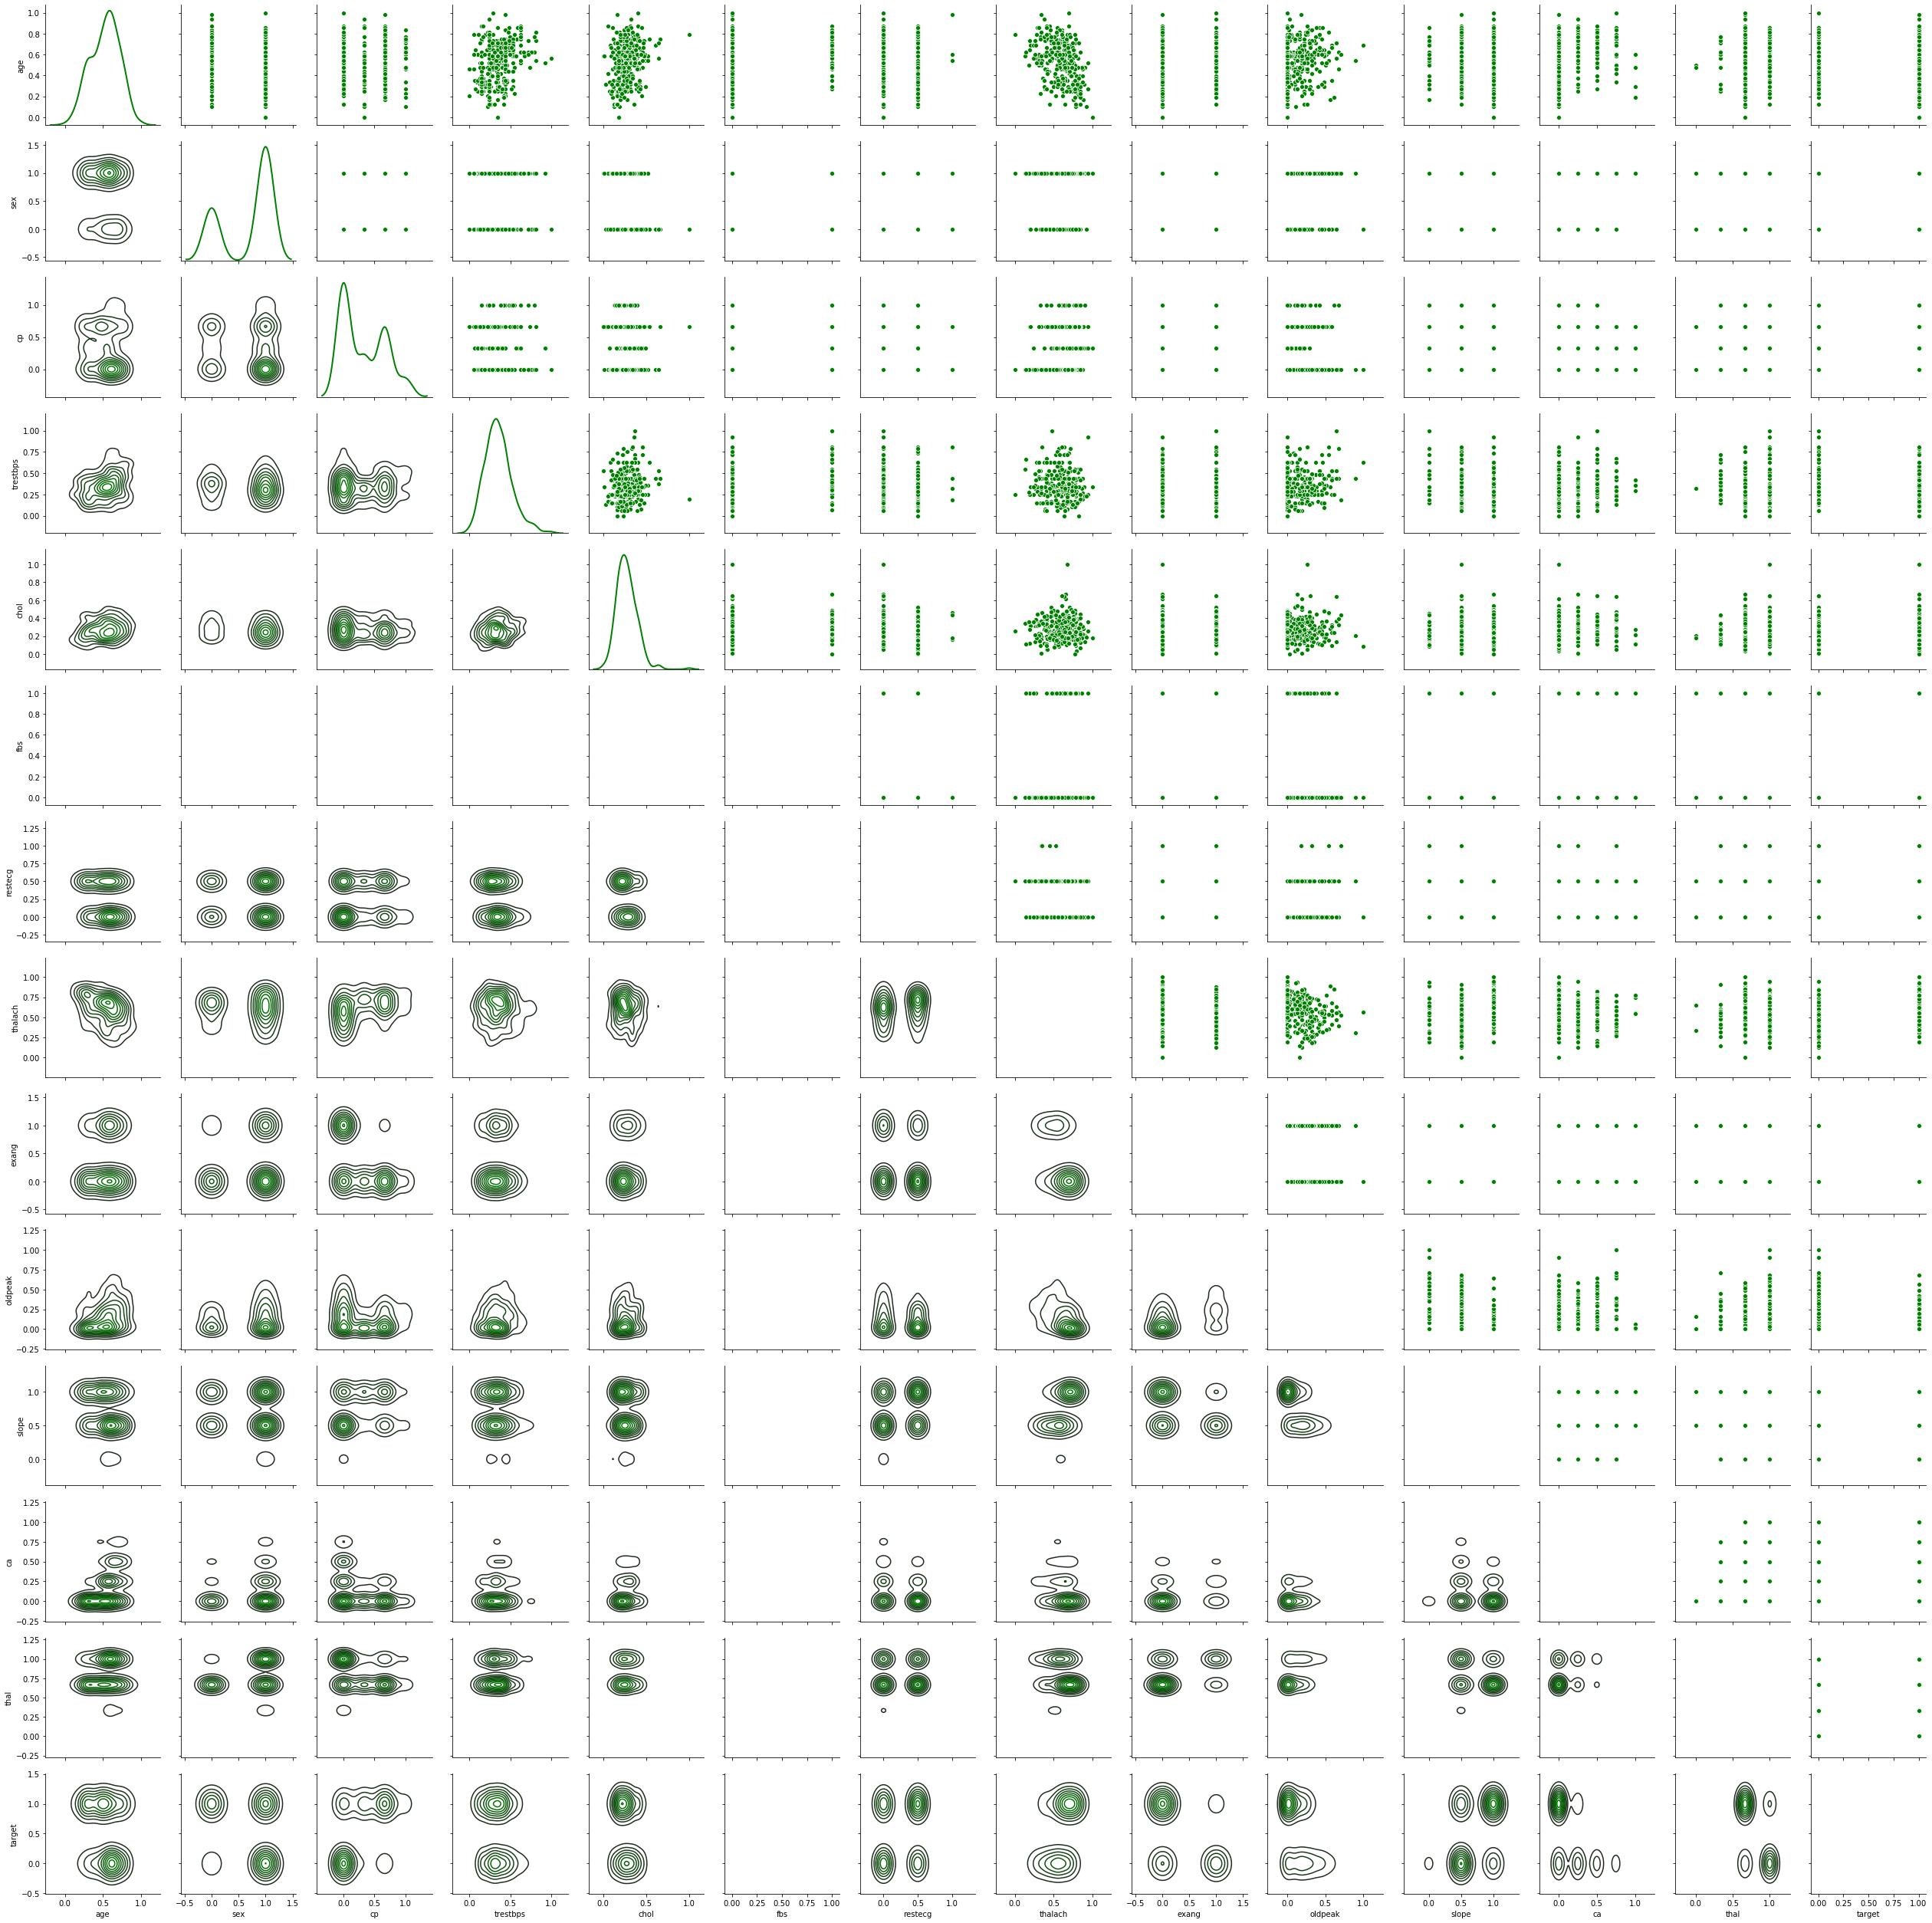

In [28]:
# Una gráfica que ayudará a visualizar relaciones de manera gráfica entre las columnas no categóricas
g = sns.PairGrid(heart_df, diag_sharey=False)
g.map_lower(sns.kdeplot, color='g')
g.map_upper(sns.scatterplot, color='g')
g.map_diag(sns.kdeplot, lw=2,color='g')

## Implementación de la regresión logística
Se procede a implementar los métodos de la regresión logística. 

In [32]:
import numpy as np
import random as rnd


def derivada_teta(tetas, x, y):
    """Realiza la derivada de la función de costo
        para cualquier parámetro teta
    """
    return np.dot(x, funcion_h(tetas, x) - y) / len(y)

def funcion_h(tetas, x):
    """Realiza la función sigmoide
        para cualquier parámetro teta
    """
    return np.power((1 + np.exp(-1 * np.dot(x.T, tetas)) ), -1) 

def funcion_costo(tetas, x, y):
    """Realiza la función de costo
        para cualquier parámetro teta
    """
    return (np.dot(y, np.log(funcion_h(tetas, x))) + np.dot((1-y), np.log(1 - funcion_h(tetas, x)))  ) / -len(y)


In [33]:
def descenso_gradiente(tetas, x, y, razon_de_aprendizaje = 0.001, numero_de_iteraciones_maximo = 10000, tolerancia = 0.1):
    """Sirve para implementar el descenso del gradiente
        y obtener las tetas que mejor describen la función.
    """
    # variables de flujo del gradiente
    teta_gradiente = tetas.copy()
    converger = True
    # Ciclo del descenso
    while (converger):
        # hacer derivada de funcion
        # moverse en el espacio
        numero_de_iteraciones_maximo -= 1
        teta_temporal = teta_gradiente.copy()
        derivadas = derivada_teta(teta_temporal, x, y)
        # Línea para debug
        # print("Paso: ", numero_de_iteraciones_maximo, "Costo: ", funcion_costo(teta_gradiente, x, y, lambda_var))
        # Avisar si salen Nan
        if np.isnan(derivadas).any() | np.isinf(derivadas).any():
            print("Falló en el paso", numero_de_iteraciones_maximo)
            print(teta_gradiente)
            print(derivadas)
            print("Costo: ", funcion_costo(teta_gradiente, x, y))
        teta_gradiente -= razon_de_aprendizaje * derivadas
        if (np.linalg.norm(derivadas) < tolerancia) or (numero_de_iteraciones_maximo == 0):
            converger = False
    return teta_gradiente

In [36]:
# Medir cuáles valores efectivamente fueron predichos
def precision_del_dataset(tetas, x, y):
    """Mide mediante aproximación si realmente predijo el 
        valor que era. 
    """
    y_pred = np.round(funcion_h(tetas, y))
    contador = 0
    for i in range(len(y_pred)):
        if(round(y_pred[i]) == y[i]):
            contador += 1
    return contador * 100 / len(y)

In [37]:
# Selector de modelos
def selector_de_modelos(resultados, flag_cv = False): # Selecciona el modelo con menor CV
    """Selecciona el mejor modelo de acuerdo a su testing cost.
        Puede priorizar la precisión si se activa la flag, donde
        dará prioridad al modelo con CV más bajo.
    """
    indice = 2
    if flag_cv:
        indice += 1 # Si se usa como base CV    
    comodin = resultados[0]
    for i in resultados:
        if(i[indice] < comodin[indice]):
            comodin[indice] = i[indice]
    return comodin 

In [168]:
# Mi implementación de CV
def cross_validation_simple(train, test, cv, degree, columnas, razon_de_aprendizaje = 0.01, numero_de_iteraciones_maximo=10000):
    """Es una implementación simple de CV donde se almacenan los datos 
        en arreglos distintos y luego se aplcia iterativamente con un grado
        mayor.
        1. training set
        2. testing set
        3. CV set
        4. grado hasta el que se desea iterar [x1 x1^2 x2 x2^2] para grado 2
        5. numero de columnas a utilizar del dataset inicial
    """
    partes = [train, test, cv]
    resultados = []
    for grado in range(1, degree + 1): # se le suma 1 porque Python no es inclusivo 
        resultado = []
        resultados.append([])
        for i in range(len(partes)):
            x = partes[i].iloc[:, 0:13].to_numpy()
            y = partes[i]['target'].tolist()
            # Construcción de polinomio
            x = constructor_polinomio(x, grado)
            x = np.array(x, dtype=np.float64)
            y = np.array(y, dtype=np.float64)
            tetas = [0 for i in range(((13) * grado) + 1)] # n elementos ya que tenenmos n variables
            tetas = np.array(tetas, dtype=np.float64)
            tetas = tetas
            # Debug de formas
            #print("x ", x.shape)
            #print("y ", y.shape)
            #print("tetas ", tetas.shape)
            if (i == 0): # training
                resultados[grado - 1].append(grado)
                resultado = descenso_gradiente(tetas, x, y, razon_de_aprendizaje**grado, numero_de_iteraciones_maximo)
                resultados[grado - 1].append(resultado) # Guardamos tetas
            elif (i == 1): # testing
                resultados[grado - 1].append(funcion_costo(resultado, x, y))
                # resultados[grado - 1].append(precision_del_dataset(resultado, x, y)) 
            else: # CV
                resultados[grado - 1].append(funcion_costo(resultado, x, y))
                # resultados[grado - 1].append(precision_del_dataset(resultado, x, y))
    return resultados

In [169]:
# Construcción de polinomio
def constructor_polinomio(x, grado):
    """Construye columnas en un arreglo respetando el parámetro
        inicial y el grado enviado.
        1, x, x^2, x^3, x^n
    """
    x = x.T
    x_nuevo = []
    for k in x:
        for i in range(1, grado + 1): # Se le suma 1 porque Python excluye el último número
            x_nuevo.append(np.power(k, i))
    x_nuevo = np.array(x_nuevo)
    # print(x_nuevo.shape)
    z = np.ones((len(x.T), 1))   
    x_nuevo = np.append(x_nuevo.T, z, axis=1)
    x_nuevo = x_nuevo.T
    # print(x_nuevo.shape)
    return x_nuevo

## Segmentando la data entre training, testing y CV set
Se partirá la data 80, 10, 10, para cada uno de los sets.

In [170]:
# Haciendo el splitting entre training set y test set
train, test = train_test_split(heart_df, test_size=0.20) # Usé la librería de sklearn para hacerlo de manera más simple
test, cv = train_test_split(test, test_size=0.50) # Se parte entre CV y test (50 y 50 del 20%)

In [171]:
# El Cross-Validation se ejecutará por grados 
degree = 5 # Número de veces que se ejecuta el CV.
modelos = cross_validation_simple(train, test, cv, degree, columnas_correlacionadas)
modelos

[[1, array([-0.05464742, -0.32070159,  0.51639418, -0.02362844,  0.02358649,
         -0.01019051,  0.10386252,  0.31370306, -0.56960837, -0.20759408,
          0.36093287, -0.2962105 , -0.11659772,  0.12518089]), 0.4810673015851527, 0.5497175640928522],
 [2, array([ 0.00028209, -0.00576818, -0.03860459, -0.03860459,  0.08032732,
          0.05216285,  0.00231817, -0.00306989,  0.00757652,  0.00366719,
          0.00062697,  0.00062697,  0.01861802,  0.00723854,  0.05277771,
          0.05044874, -0.08453309, -0.08453309, -0.02719249, -0.01533753,
          0.06224539,  0.07568717, -0.03778905, -0.01759504, -0.00494821,
         -0.03206592,  0.03153638]), 0.6193696625993897, 0.6451862631389356],
 [3, array([ 4.84988200e-05, -3.22894757e-05, -4.06633586e-05, -3.51630268e-04,
         -3.51630268e-04, -3.51630268e-04,  8.73675783e-04,  5.70943733e-04,
          3.99697859e-04,  5.57206811e-05, -1.74221463e-05, -3.43702825e-05,
          1.03372169e-04,  4.65423988e-05,  3.23784754e-05, 

In [172]:
# Seleccionando el modelo ganador
modelo_ganador = selector_de_modelos(modelos)
modelo_ganador

[1, array([-0.05464742, -0.32070159,  0.51639418, -0.02362844,  0.02358649,
        -0.01019051,  0.10386252,  0.31370306, -0.56960837, -0.20759408,
         0.36093287, -0.2962105 , -0.11659772,  0.12518089]), 0.4810673015851527, 0.5497175640928522]

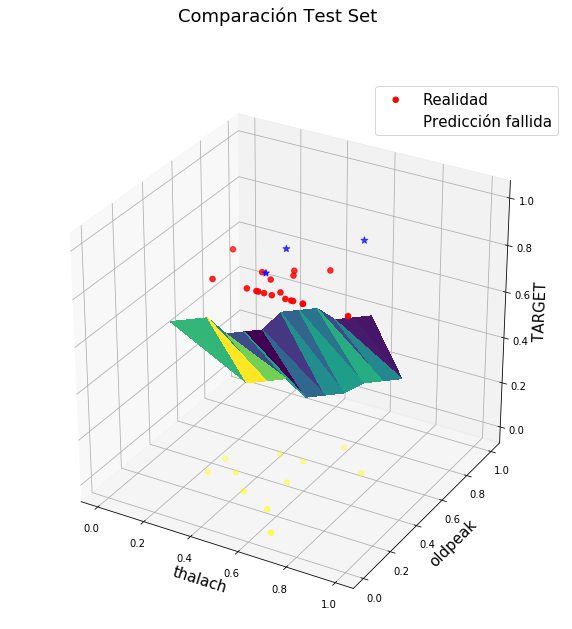

In [200]:
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

x = test[columnas_correlacionadas[1]].tolist()
y = test[columnas_correlacionadas[3]].tolist()
z = test['target'].tolist()
z_2 = funcion_h(modelo_ganador[1], constructor_polinomio(test.iloc[:, 0:13].to_numpy(), modelo_ganador[0]))

a = np.empty(test.T.shape)
filler = np.arange(0,1.01,0.05)
index = np.arange(a.size)
np.put(a,index,filler)
z_3 = funcion_h(modelo_ganador[1], a)

plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10) 
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

plt.suptitle('Comparación Test Set')

c = ['red' if zeta==1 else 'yellow' for zeta in z] #coloreando

z_falsos = np.logical_xor(z, np.round(z_2))

c_2 = [mcolors.to_rgba('blue', 1) if zeta else mcolors.to_rgba('blue', 0) for zeta in z_falsos] #coloreando
    
ax.scatter(x, y, z, c=c, label="Realidad", marker='o', s=30)
ax.scatter(x, y, np.round(z_2), c=c_2, label="Predicción fallida", marker="*", s=50)
ax.plot_trisurf(a[0], a[1], z_3, cmap='viridis', linewidth=0, antialiased=False)
ax.set_xlabel(columnas_correlacionadas[1])
ax.set_ylabel(columnas_correlacionadas[3])
ax.set_zlabel('TARGET')
ax.legend()


plt.show()

## Matriz de confusión
Se procede a hacer una matriz de confusión del modelo en el testing set.

In [201]:
from sklearn.metrics import confusion_matrix # librería a usar

In [209]:
cm = confusion_matrix(z, np.round(z_2))
cm = cm / len(z)

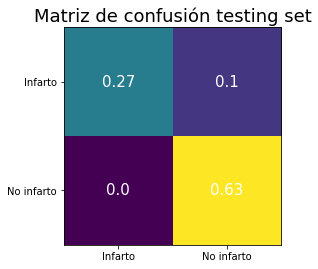

In [224]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_title("Matriz de confusión testing set")
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(["Infarto", "No infarto"])
ax.set_yticklabels(["Infarto", "No infarto"])
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, np.round(cm[i, j], 2),
                       ha="center", va="center", color="w")

## Análisis final
Tras ver la matriz de confusión anterior se puede decir que el modelo tiene un 90% de precisión, además de que las variables seleccionadas no necesitan ser elevadas a un grado alto, basta con ser una ecuación lineal [grado 1]. 

### Comentarios adicionales
Sería interesante implementar funciones de penalización que modifiquen el comportamiento de una función ajustándola aún más dando como resultado una predicción más atinada.

<img src="https://s-media-cache-ak0.pinimg.com/736x/b0/43/61/b043610d0e33db1d2278acf2318149b3.jpg" alt="drawing" width="100"/>